# Week 3: Machine Learning 

# Introduction

I choose the Employee Attrition dataset from Kaggle because it seemed to me that the variables are easy to work with and because I understand what the variables mean and how they are measured

# Data cleaning

In [70]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

In [71]:
df = pd.read_csv("employee.csv")
df.head(10) #show a bit more of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


I selected the 7 variables below according to logic. Later in this notebook, I calculate the correlation to see if the variables are correlated. Below, I made a subset with the seven choosen variables

In [72]:
df.loc[:,["Attrition","TotalWorkingYears","Age","YearsInCurrentRole","YearsWithCurrManager","YearsAtCompany","YearsSinceLastPromotion"]]

,Attrition,TotalWorkingYears,Age,YearsInCurrentRole,YearsWithCurrManager,YearsAtCompany,YearsSinceLastPromotion
0,Yes,8,41,4,5,6,0
1,No,10,49,7,7,10,1
2,Yes,7,37,0,0,0,0
3,No,8,33,7,0,8,3
4,No,6,27,2,2,2,2
...,...,...,...,...,...,...,...
1465,No,17,36,2,3,5,0
1466,No,9,39,7,7,7,1
1467,No,6,27,2,3,6,0
1468,No,17,49,6,8,9,0


Below I get rid of the emtpy cells and count the Attrition variable 

In [73]:
df1 = df.dropna() #get rid of rows with empty cells
df1.head()
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Because Attrition is not numerical, I change yes and no to 0 and 1

In [74]:
df['Attrition'].replace(['Yes', 'No'], [0,1], inplace=True) #the axis=1 means: add it to the columns (axis=0 is rows)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory data analysis

Now that the variables are easy to work with, I make a pairplot to see the correlation

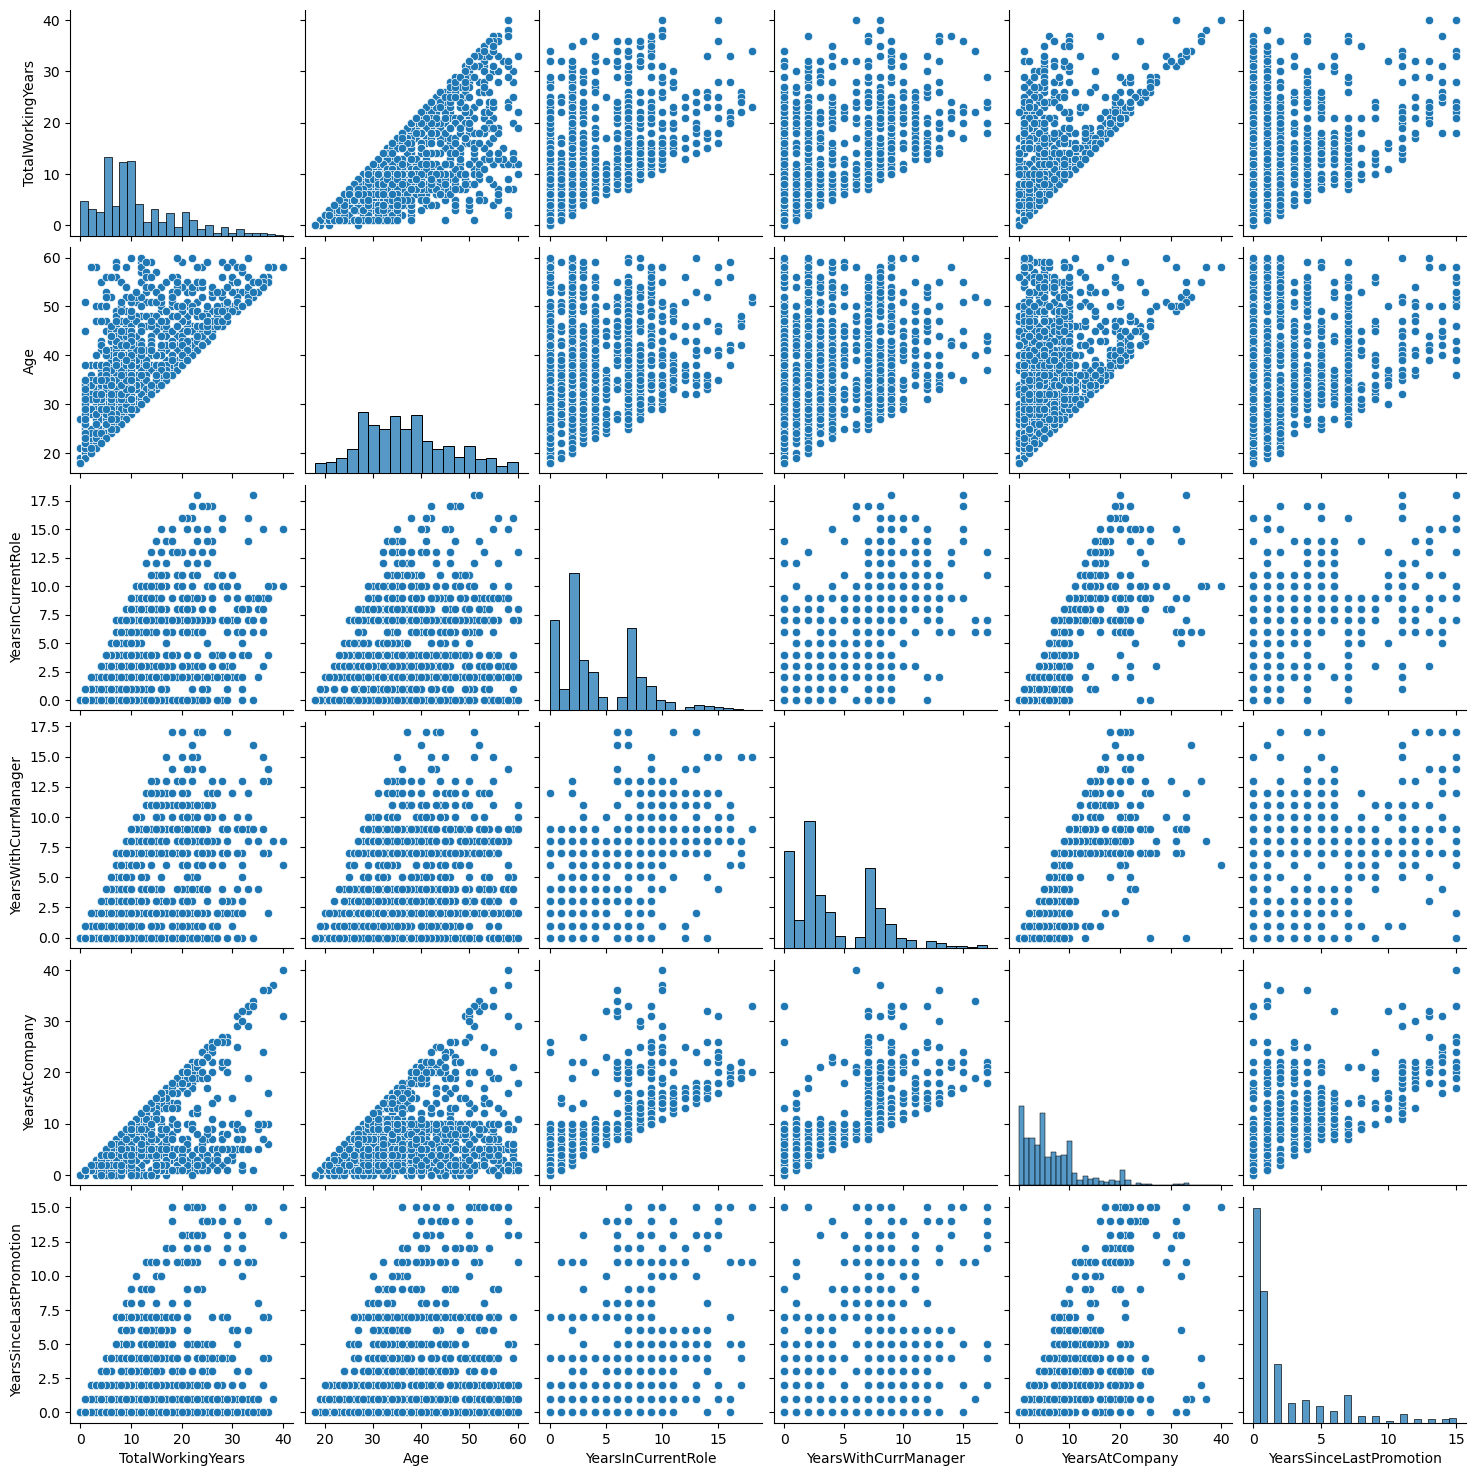

In [75]:
df_subset=df1[["TotalWorkingYears","Age","YearsInCurrentRole","YearsWithCurrManager","YearsAtCompany","YearsSinceLastPromotion"]]
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot

In [76]:
corr = df1[["TotalWorkingYears","Age","YearsInCurrentRole","YearsWithCurrManager","YearsAtCompany","YearsSinceLastPromotion"]].corr() 
corr

,TotalWorkingYears,Age,YearsInCurrentRole,YearsWithCurrManager,YearsAtCompany,YearsSinceLastPromotion
TotalWorkingYears,1.000000,0.680381,0.460365,0.459188,0.628133,0.404858
Age,0.680381,1.000000,0.212901,0.202089,0.311309,0.216513
YearsInCurrentRole,0.460365,0.212901,1.000000,0.714365,0.758754,0.548056
YearsWithCurrManager,0.459188,0.202089,0.714365,1.000000,0.769212,0.510224
YearsAtCompany,0.628133,0.311309,0.758754,0.769212,1.000000,0.618409
YearsSinceLastPromotion,0.404858,0.216513,0.548056,0.510224,0.618409,1.000000


As you can see above and below in the heatmap, there is a strong correlation between Yearswithcurrentmanager and Yearsatcompany and Yearsincurrentrole and Yearsatcompany. The weakest variable in this subset is Age as the correlation is mostly below 0.3 with in combination with other variables

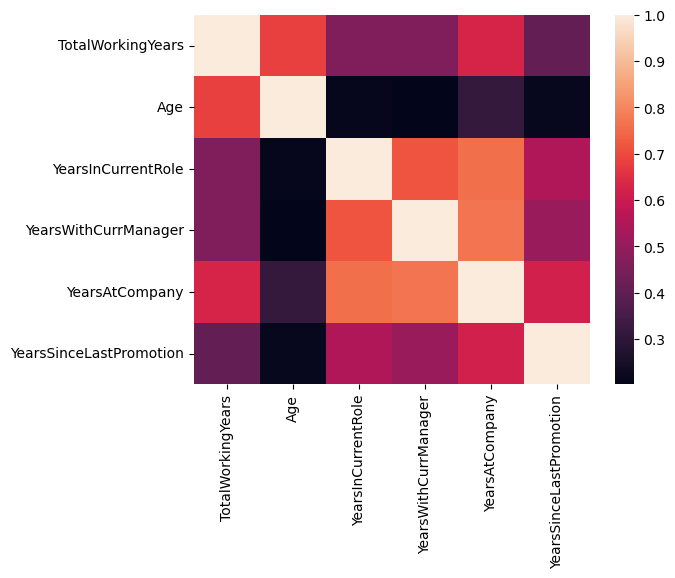

In [77]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

For the final part of my exploratory data analysis, I made the correlations between Yearsatcompany and Yearswithcurrentmanager visual. My conclusion is that with the graphs and tables I calculated, my seven choosen variables are fit to base a predictive model on

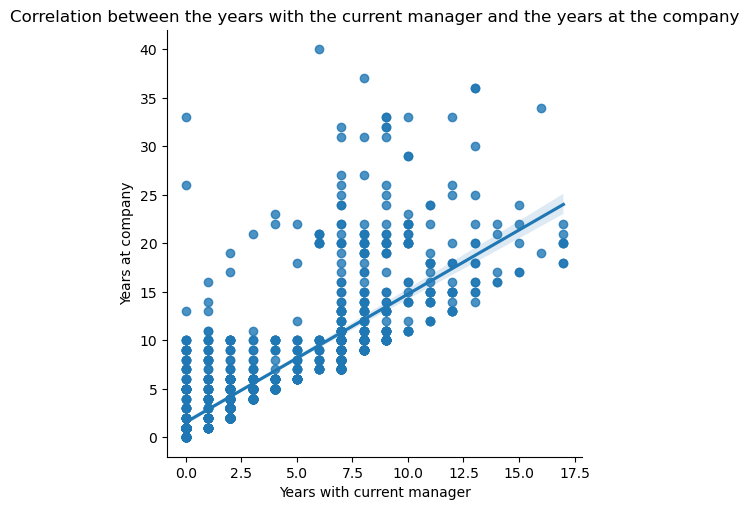

In [78]:
sns.lmplot(x='YearsWithCurrManager', y='YearsAtCompany', fit_reg=True, data=df) 
plt.xlabel('Years with current manager') 
plt.ylabel('Years at company')
plt.title('Correlation between the years with the current manager and the years at the company')
plt.show()

# Predictive model - Random forest


I choose Random Forest for my predictive model. Below, I split the data set into a training and test set. The algortihm works as like this: it is build up from decesion trees that are constructed for my traning data set and it decides the most voted prediction. Then it takes all the decision trees and calculates the most voted prediction as a result. It does this by learning from the combination of the decision trees

In [79]:
X = df.loc[:,["TotalWorkingYears","Age","YearsInCurrentRole","YearsWithCurrManager","YearsAtCompany","YearsSinceLastPromotion"]]
y = df['Attrition'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,TotalWorkingYears,Age,YearsInCurrentRole,YearsWithCurrManager,YearsAtCompany,YearsSinceLastPromotion
99,17,44,2,2,3,1
785,14,40,10,1,11,11
918,31,51,10,10,29,11
1335,7,39,2,2,2,2
1182,4,36,2,2,3,1


Below, I train the model using sklearn

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [81]:
rf.score(X_test,y_test)

0.8117913832199547

In [82]:
rf.classes_

array([0, 1])

## Evaluation

In [86]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['no attrition (actual)', 'attrition (actual)'], columns = ['no attrition (pred)', 'attrition (pred)']) #label and make df
cm

,no attrition (pred),attrition (pred)
no attrition (actual),13,64
attrition (actual),19,345


Using a classification report, I calculated the precision and recall

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.17      0.24        77
           1       0.84      0.95      0.89       364

    accuracy                           0.81       441
   macro avg       0.62      0.56      0.57       441
weighted avg       0.77      0.81      0.78       441



So if Yes is 0 and No is 1, the following can be stated:
Precision: out of all employees that wanted promotion, only 41% actually did
Recall: out of all employees that got promotion, the model only predicted this outcome correctly for 17%
So it seems that it is not very accurate because the precision and recall are quite low

# Conclusion

So for this assignment where I made a predictive model, I choose the 7 variables with the highest correlation. My analysis shows that they dont have a very strong correlation, but they were still the best options to work with. I already expected that my predictive model would not have a very strong predictive values. Now, after having made my model, my hypothesis seems right. This is because the precision and recall are not very high and so the accuracy is also not very good